**Muhamad Dio Riza Pratama**

**Universitas Buana Perjuangan**

**Dicoding Indonesia - Kampus Merdeka**

# Import Dataset

In [ ]:
pip install jcopml

     |████████████████████████████████| 101 kB 3.5 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.14-py2.py3-none-any.whl size=33655 sha256=43f55a25889536e19650f2bffd8b732f71a21c4e4e16e27986b217304fbf1c6f
  Stored in directory: /root/.cache/pip/wheels/d9/6a/86/9a622c06f65732afe0e31c02a92fae6ab663ffd7162bcf5125
Successfully built jcopml


In [ ]:
import numpy as np
import pandas as pd
import zipfile
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn import metrics

from jcopml.tuning import random_search_params as rsp
from jcopml.tuning.space import Real, Integer
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import grid_search_params as gsp

Library yang digunakan adalah library umum yaitu pandas, seaborn, matplotlib yang digunakan untuk membaca data baik dalam tulisan ataupun gambar grafik. Selanjutnya adalah library sklearn yang digunakan untuk keperluan pembuatan model, dimulai dari splitting model, pembuatan model hingga metric evaluasi semuanya menggunalan scikit-learn.

Terdapat tambahan library yang cukup asing, yaitu jcopml. J.COp ML adalah library Machine Learning untuk melengkapi alur kerja scikit-learn. Ini mencakup fungsi pembantu untuk visualisasi, penyetelan, saluran pipa, dan pentingnya fitur. dikembangkan oleh Wira D. K. Putra. 

Library ini akan digunakan pada notebook ini untuk membuat pipeline machine learning dan juga untuk mengecek data yang hilang dengan tampilan plotting.

# Mengambil Dataset dari Kaggle Pima Indians Diabetes Dataset

Link dataset : https://www.kaggle.com/uciml/pima-indians-diabetes-database


### Siapa Pima Indian?

"The Pima (atau Akimel O'odham, juga dieja Akimel O'otham, "River People", sebelumnya dikenal sebagai Pima) adalah sekelompok penduduk asli Amerika yang tinggal di daerah yang terdiri dari apa yang sekarang menjadi Arizona tengah dan selatan. Populasi mayoritas dari dua band yang masih hidup dari Akimel O'odham didasarkan pada dua reservasi: Keli Akimel O'otham di Komunitas Indian Sungai Gila (GRIC) dan On'k Akimel O'odham di Komunitas Indian Pima-Maricopa di Salt River (SRPMI).” Wikipedia

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammaddioriza","key":"9659fcadd4165a4b3a9c1a4820340a31"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!pip install -q kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 20.0MB/s]


In [ ]:
local_zip = '/content/pima-indians-diabetes-database.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Import Dataset & EDA

In [ ]:
data_train = pd.read_csv('/tmp/diabetes.csv',)
data_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset terdiri dari beberapa variabel prediktor medis (independen) dan satu variabel target (dependen), Hasil. Variabel bebas meliputi jumlah kehamilan yang dialami pasien(pregnancies), BMI(BMI), kadar insulin(Glucose), usia(Age), SkinThickness(Ketebalan Kulit), DiabetesPedigreeFunction(Fungsi Silsilah Diabetes) dan seterusnya.

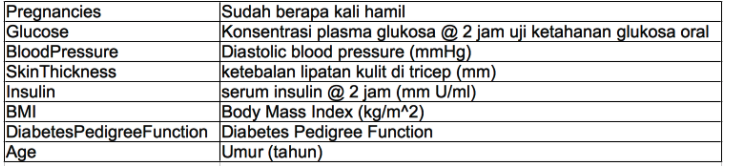



---



---



**Diabetes adalah penyakit kronis atau yang berlangsung jangka panjang yang ditandai dengan meningkatnya kadar gula darah (glukosa) hingga di atas nilai normal.** Ada dua jenis utama diabetes, yaitu diabetes tipe 1 dan tipe 2.

Penyebab Diabetes
Diabetes disebabkan karena adanya gangguan dalam tubuh, sehingga tubuh tidak mampu menggunakan glukosa darah ke dalam sel, sehingga glukosa menumpuk dalam darah.

**Pada diabetes tipe 1**, gangguan ini disebabkan sistem kekebalan tubuh yang biasanya menyerang virus atau bakteri berbahaya lainnya, malah menyerang dan menghancurkan sel penghasil insulin. Akibatnya, tubuh kekurangan atau bahkan tidak dapat memproduksi insulin sehingga gula yang seharusnya diubah menjadi energi oleh insulin menyebabkan terjadinya penumpukan gula dalam darah.

**Sedangkan pada diabetes tipe 2**, tubuh bisa menghasilkan insulin secara normal, tetapi insulin tidak digunakan secara normal. Kondisi ini dikenal juga sebagai resistensi insulin.

Gejala diabetes akan dialami berbeda-beda oleh tiap pengidapnya. Namun, secara umum ada beberapa gejala yang akan dialami oleh pengidap diabetes tipe 1 maupun tipe 2, seperti peningkatan rasa haus, peningkatan frekuensi buang air kecil, kelelahan terus menerus, gangguan penglihatan, dan terjadinya infeksi terus menerus. Infeksi yang terjadi umumnya terjadi pada bagian gusi maupun kulit. Sedangkan pada wanita, waspada infeksi bagian bagian vagina yang bisa menjadi tanda penyakit diabetes.

# Problem Statements dan Goals


Diabetes adalah salah satu penyakit paling mematikan di dunia. Apabila dibiarkan, penyakit ini bisa menimbulkan komplikasi yang secara perlahan dapat menyerang organ penting di tubuh manusia seperti mata (kebutaan), otak (stroke), hingga gagal jantung dan gagal ginjal. 

Dari data yang ada kita akan mencoba mencari tahu fitur/faktor apa saja yang paling mempengaruhi penyakit diabetes dan jika dibuat model machine learning apakah bisa?

### Solusi yang ditawarkan
 

1.   Membuat model machine learning dengan fitur yang ada sebaik mungkin dengan mencoba dengan satu model lebih
2.   Mendapatkan faktor/fitur yang paling mempengaruhi penyakit diabetes dengan menggunakan *feature engineering*




# Data Preparation and Understanding

In [ ]:
data_train.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Data target antara diabetes dan tidak cukup tidak seimbang dengan timpang jauh sekitar 50% dari total jumlah disetiap data. Ini artinya dataset imbalance dan juga jumlahnya sangat terbilang kurang untuk membuat model machine learning.

Tetapi dengan menghandle permasalahan tersebut kita bisa mencoba terlebih dahulu hasil yang didapatkan nanti di evaluasi model dengan menggunakan K-Folds cross-validator

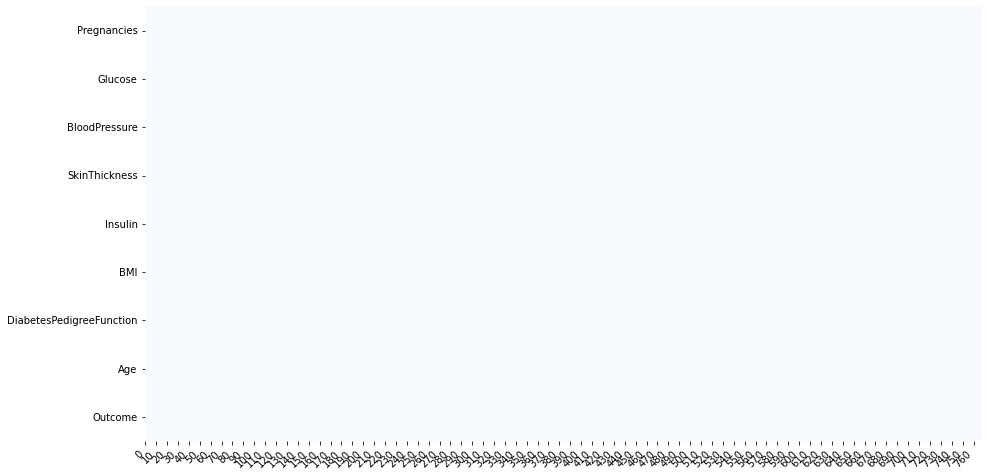

In [ ]:
plot_missing_value(data_train)

Dari hasil plotting data yang kosong atau NaN ternyata dataset yang diimport dari kaggle bersih dan tidak ada yang kosong disetiap kolomnya.

In [ ]:
data_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Handle missing value

In [ ]:
#mengecek nilai kosong dalam data
for i in data_train.columns:
    print(i,len(data_train[data_train[i]==0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [ ]:
#mengubah nilai kosong menjadi mean dengan cara menrubahnya ke NAN lalu dibuat menjadi mean
data_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data_train['Glucose'].fillna(data_train['Glucose'].mean(),inplace=True)
data_train['BloodPressure'].fillna(data_train['BloodPressure'].mean(),inplace=True)
data_train['SkinThickness'].fillna(data_train['SkinThickness'].mean(),inplace=True)
data_train['Insulin'].fillna(data_train['Insulin'].mean(),inplace=True)
data_train['BMI'].fillna(data_train['BMI'].mean(),inplace=True)

data_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data preparation disini hanya mengubah nilai yang tadinya kosong menjadi bernilai. Ini digunakan agar tidak ada data yang tidak relevan dan membuat data menjadi lebih baik. Karena data yang tidak relevan, walaupun beberapa bisa mempengaruhi kinerja model yang akan dibuat.

Tekniknya adalah merubah data kosong dengan `.replace(0, np.nan) `data kosong akan berubah menjadi nan kemudian diisi data nan tersebut dengan `fillna.mean()` diambil nilai rata - rata dari setiap baris data

Data yang kita miliki sudah terisi dengan data yang baik dan semuanya memiliki nilai

### Visualisasi persebaran data disetiap kolom

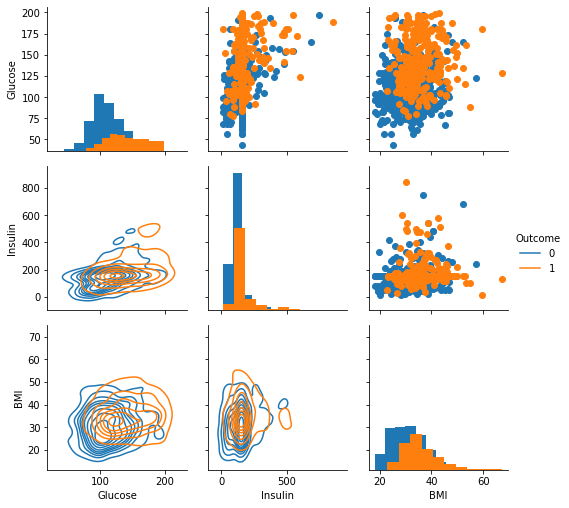

In [ ]:
g = sns.PairGrid(data_train, vars=['Glucose', 'Insulin', 'BMI'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

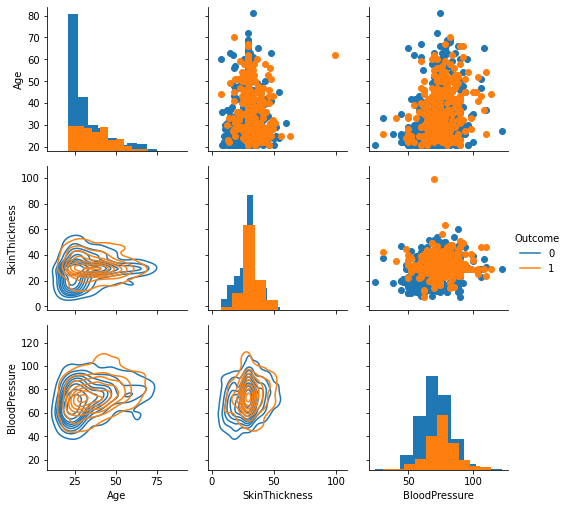

In [ ]:
g = sns.PairGrid(data_train, vars=['Age', 'SkinThickness', 'BloodPressure'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()


# Dataset Splitting

In [ ]:
X = data_train.drop(columns="Outcome")
y = data_train.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Kolom Outcome tidak digunakan karena dinilai tidak diperlukan dan tidak ada hubungannya dengan fitur - fitur yang diperlukan untuk membuat model machine learning.

# Training

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


# Modelling dengan MLPClassifier

MLPClassifier adalah singkatan dari Multi-layer Perceptron classifier yang dalam namanya terhubung ke Neural Network. Multilayer perceptron (MLP) adalah model jaringan saraf tiruan feedforward yang memetakan set data input ke set output yang sesuai. Sebuah MLP terdiri dari beberapa lapisan dan setiap lapisan sepenuhnya terhubung ke yang berikutnya. Node pada layer adalah neuron dengan fungsi aktivasi nonlinier, kecuali node pada input layer. Antara lapisan input dan output mungkin ada satu atau lebih lapisan tersembunyi nonlinier.

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                             "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.7s


{'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (32, 16, 8), 'mlp__learning_rate_init': 0.005}
0.7361563517915309 0.7231308783676073 0.7012987012987013


[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   42.6s finished


## Mencari Feature Importance

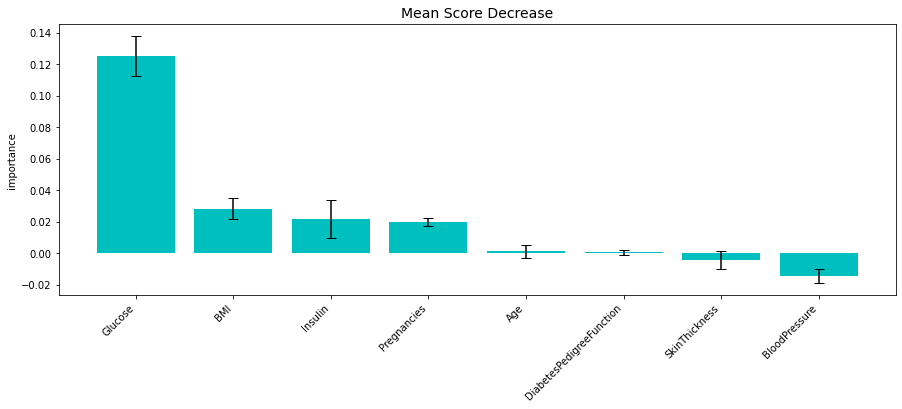

In [ ]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

Setelah mendapatkan kolom terbaik untuk membuat machine learning maka diambil 4 kolom teratas yang dinilai berpengaruh terhadap kinerja model machine learning yang dilatih

In [ ]:
#membuat pipeline 
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), ["Glucose", "BMI", "SkinThickness"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

#setting parameter
parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.5s


{'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (16,), 'mlp__learning_rate_init': 0.01}
0.7801302931596091 0.7850470269408577 0.7077922077922078


[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   54.0s finished


# Test Model Kedua dengan XGBoost

In [ ]:
#setting parameter
parameter = {
    'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
    'algo__gamma': Integer(low=1, high=10),
    'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
    'algo__max_depth': Integer(low=1, high=10),
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
    'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
    'algo__subsample': Real(low=0.3, high=0.8, prior='uniform')}

In [ ]:
#membuat pipeline 
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Glucose", "BMI", "SkinThickness"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'algo__colsample_bytree': 0.7664965988271097, 'algo__gamma': 7, 'algo__learning_rate': 0.09349508632615255, 'algo__max_depth': 10, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.0013374903427249348, 'algo__reg_lambda': 6.488240192497597, 'algo__subsample': 0.36036465777964927}
0.7850162866449512 0.7622588872947552 0.7142857142857143


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished


#Model Evaluation

Untuk mengukur kinerja suatu model, kita memerlukan beberapa elemen :

Bagian - bagian yang cukup penting:

* **Confusion matrix** : juga dikenal sebagai matriks kesalahan, memungkinkan visualisasi kinerja suatu algoritma :

    * true positive (TP) : Diabetes diidentifikasi dengan benar sebagai diabetes
    * true negative (TN) : Sehat diidentifikasi dengan benar sebagai Sehat
    * false positive (FP) : Sehat salah diidentifikasi sebagai diabetes
    * false negative (FN) : Diabetes salah diidentifikasi sebagai Sehat

* **Metric**  :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP)
    * Recall : TP / (TP + FN)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall))

### Confution Matrix

Accuracy: 0.7142857142857143


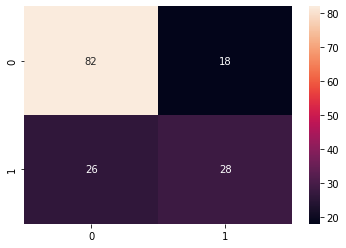

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot = True, fmt = "d")

## Metric

### Precision

In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision: ",precision)

Precision:  0.6086956521739131


### Recall

In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall is: ",recall)

Recall is:  0.5185185185185185


### Fscore

In [ ]:
print((2*precision*recall)/(precision+recall))

0.5599999999999999


# Kesimpulan

Dari penggunaan dua model yang dipakai untuk dataset ini, maka pengujian pada dataset XGBoost terlihat lebih baik. Contohnya bisa dilihat pada evaluasi model Precision yang merupakan pembagian dari jumlah total contoh positif yang diklasifikasikan bernilai benar dengan jumlah total contoh positif yang diprediksi. High Precision menunjukkan contoh berlabel positif memang positif (FP rendah). 

Dari hasil metric yang didapat memang kurang dari cukup untuk model yang baik. Tetapi pertimbangan dari hasil tersebut dapat dipengaruhi oleh:

*   Jumlah data yang sedikit
*   Data label yang tidak seimbang antara diabetes dan sehat
*   Tuning dan model yang harus lebih banyak diriset untuk menemukan yang terbaik

Permasalahan yang dicari telah didapat dengan mendapatkan faktor terpenting yang mempengaruhi label diabetes atau tidak yang dicari menggunakan fitur *mean_score_decrease*  yaitu dengan mencari fitur - fitur penting yang bisa mempengaruhi model dengan cari memutuskan hubungan antara fitur dan target, sehingga penurunan skor model menunjukkan seberapa besar model tergantung pada fitur. Teknik ini mendapat manfaat dari menjadi model agnostik dan dapat dihitung berkali-kali dengan permutasi fitur yang berbeda.

Dan hasil yang didapat adalah Glukosa, BMI dan Ketebalan kulit menjadi faktor yang paling berpengaruh untuk terjangkit diabetes. Untuk Glukosa dan BMI sudah umum menjadi perhatian dan faktor teratas dalam diabetes namun bagaimana dengan ketebalan kulit?


**Ternyata dilansir dari halodoc.com, gejala diabetes ditandai dengan perubahan  yang terjadi pada kulit, seperti warna kulit yang menjadi lebih gelap, bersisik, bahkan kering dan pecah-pecah. Hal tersebut terjadi karena kandungan insulin yang tinggi dalam tubuh, sehingga mendorong terjadinya perubahan pigmen yang mengatur warna dan tekstur kulit. Setelah hal tersebut terjadi, mulai muncul gejala, salah satunya adalah bercak hitam pada kulit.**











#### Referensi



*   https://www.halodoc.com/artikel/ketahui-perbedaan-gatal-biasa-dengan-gatal-diabetes
*   https://www.dicoding.com/academies/319/tutorials/16979?from=17053
*   https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
*   https://www.kaggle.com/uciml/pima-indians-diabetes-database
https://xgboost.readthedocs.io/en/latest/parameter.html
*   https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
*   https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
*   https://github.com/WiraDKP/supervised_learning
*   https://pypi.org/project/jcopml/
*   https://www.youtube.com/watch?v=A9bFtzgxXDA
*   https://vik.kompas.com/diabetes/

